In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd

In [2]:
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [3]:
def convert_to_date(x):
    return datetime.strptime(x, '%Y %m %d %H')

In [4]:
# sFTP SAMS YEAR-2020
sftp_sams = pd.read_csv('X:\RA_AirQuality\Datasets\sftp-sams\hourly\year-2020.csv')
sftp_sams.head()

DateTime  Ambient Avg Temperature(SAMS|sFTP)  \
0  1/1/2020 1:00                                -9.3   
1  1/1/2020 2:00                                -9.3   
2  1/1/2020 3:00                                -9.3   
3  1/1/2020 4:00                                -9.3   
4  1/1/2020 5:00                                -9.3   

   Carbon monoxide(SAMS|sFTP)  Nitric oxide(SAMS|sFTP)  \
0                        1.30                   102.78   
1                        1.52                   135.02   
2                        1.26                    93.49   
3                        1.15                    73.48   
4                        0.81                    46.26   

   Nitrogen dioxide(SAMS|sFTP)  PM10 Total 0-10um STP(SAMS|sFTP)  \
0                        53.83                               0.2   
1                        56.32                               0.2   
2                        53.40                               0.2   
3                        50.81                               0.2   
4                        44.70                               0.2   

   PM2.5 - Local Conditions(SAMS|sFTP)  Relative Humidity(SAMS|sFTP)  \
0                                  NaN                          70.2   
1                                  NaN                          70.2   
2                                  NaN                          70.2   
3                                  NaN                          70.2   
4                                  NaN                          70.2   

   Wind Direction(SAMS|sFTP)  Wind speed(SAMS|sFTP)  
0                     140.27                   0.32  
1                     177.53                   0.77  
2                     166.56                   0.80  
3                     140.86                   0.61  
4                     155.50                   0.51

In [5]:
sftp_sams = sftp_sams.rename(columns={"Ambient Avg Temperature(SAMS|sFTP)":"Temp","Carbon monoxide(SAMS|sFTP)":"CO","Nitric oxide(SAMS|sFTP)":"NO","Nitrogen dioxide(SAMS|sFTP)":"NO2","PM10 Total 0-10um STP(SAMS|sFTP)":"PM10","PM2.5 - Local Conditions(SAMS|sFTP)":"PM2.5","Relative Humidity(SAMS|sFTP)":"Humidity","Wind Direction(SAMS|sFTP)":"Wind Dir","Wind speed(SAMS|sFTP)":"Wind Speed"})

In [6]:
sftp_sams.head()

DateTime  Temp    CO      NO    NO2  PM10  PM2.5  Humidity  Wind Dir  \
0  1/1/2020 1:00  -9.3  1.30  102.78  53.83   0.2    NaN      70.2    140.27   
1  1/1/2020 2:00  -9.3  1.52  135.02  56.32   0.2    NaN      70.2    177.53   
2  1/1/2020 3:00  -9.3  1.26   93.49  53.40   0.2    NaN      70.2    166.56   
3  1/1/2020 4:00  -9.3  1.15   73.48  50.81   0.2    NaN      70.2    140.86   
4  1/1/2020 5:00  -9.3  0.81   46.26  44.70   0.2    NaN      70.2    155.50   

   Wind Speed  
0        0.32  
1        0.77  
2        0.80  
3        0.61  
4        0.51

In [7]:
sftp_sams.describe()

Temp           CO           NO          NO2         PM10  \
count  6197.000000  6868.000000  5559.000000  5779.000000  6391.000000   
mean     14.759727     0.340563    15.690396    20.696288    39.765993   
std      12.418934     0.325198    30.563265    15.334479    42.531056   
min     -14.300000    -3.620000    -0.320000    -0.750000   -14.280000   
25%       5.760000     0.180000     1.290000     8.780000    13.660000   
50%      16.760000     0.270000     3.780000    16.870000    28.040000   
75%      24.030000     0.420000    14.540000    29.240000    52.205000   
max      38.870000     2.570000   334.810000   151.980000  1010.080000   

             PM2.5     Humidity     Wind Dir   Wind Speed  
count  6356.000000  6392.000000  8013.000000  8013.000000  
mean     11.090640    45.052672   160.943602     1.887061  
std       9.980845    22.583706    66.908147     7.778751  
min       0.000000     6.660000    11.700000     0.000000  
25%       4.800000    26.400000   116.590000     0.580000  
50%       8.140000    42.325000   160.130000     0.980000  
75%      13.830000    62.192500   196.640000     1.620000  
max     155.990000   101.700000   360.000000    99.450000

In [8]:
sftp_sams['DateTime'] = pd.to_datetime(sftp_sams.DateTime)
sftp_sams.tail()

DateTime  Temp    CO  NO    NO2   PM10  PM2.5  Humidity  \
8010 2020-12-31 20:00:00   NaN  0.43 NaN  30.82  36.52  17.26     57.00   
8011 2020-12-31 21:00:00   NaN  0.35 NaN  26.54  26.58  13.49     57.00   
8012 2020-12-31 22:00:00   NaN  0.29 NaN  25.45  28.40  11.18     57.00   
8013 2020-12-31 23:00:00   NaN  0.25 NaN  26.50  20.73  11.05     57.00   
8014 2021-01-01 00:00:00   NaN  0.38 NaN  40.45  27.82  16.04     57.26   

      Wind Dir  Wind Speed  
8010    129.04        1.18  
8011    113.10        1.26  
8012    110.54        1.68  
8013    102.12        1.71  
8014     98.08        1.63

In [9]:
sftp_sams_non_indexed = sftp_sams

In [10]:
sftp_sams = sftp_sams.set_index('DateTime')

In [11]:
sftp_sams.tail()

Temp    CO  NO    NO2   PM10  PM2.5  Humidity  Wind Dir  \
DateTime                                                                       
2020-12-31 20:00:00   NaN  0.43 NaN  30.82  36.52  17.26     57.00    129.04   
2020-12-31 21:00:00   NaN  0.35 NaN  26.54  26.58  13.49     57.00    113.10   
2020-12-31 22:00:00   NaN  0.29 NaN  25.45  28.40  11.18     57.00    110.54   
2020-12-31 23:00:00   NaN  0.25 NaN  26.50  20.73  11.05     57.00    102.12   
2021-01-01 00:00:00   NaN  0.38 NaN  40.45  27.82  16.04     57.26     98.08   

                     Wind Speed  
DateTime                         
2020-12-31 20:00:00        1.18  
2020-12-31 21:00:00        1.26  
2020-12-31 22:00:00        1.68  
2020-12-31 23:00:00        1.71  
2021-01-01 00:00:00        1.63

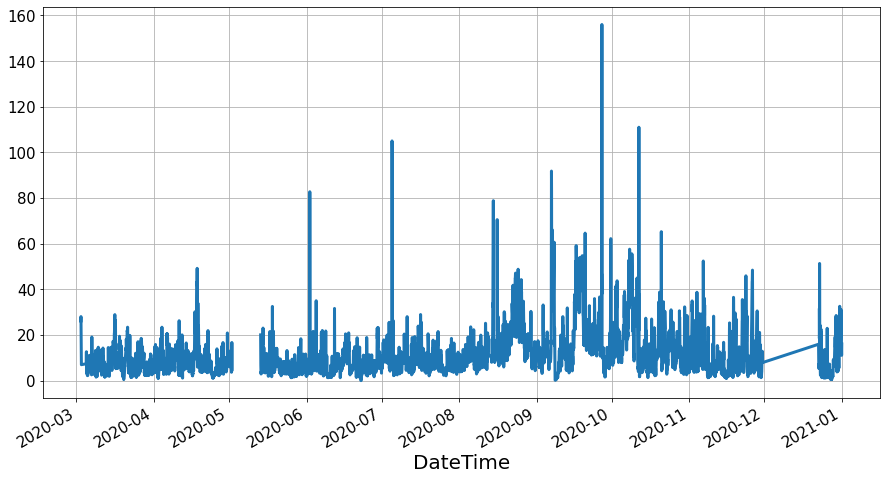

In [14]:
pm_data = sftp_sams['PM2.5']
pm_data.plot(figsize=(15,8), linewidth=3, fontsize=15, grid=True)
plt.xlabel('DateTime', fontsize=20);

In [15]:
sftp_sams['year'] = pd.DatetimeIndex(sftp_sams_non_indexed['DateTime']).year

In [16]:
sftp_sams['month'] = pd.DatetimeIndex(sftp_sams_non_indexed['DateTime']).month

In [17]:
sftp_sams['day'] = pd.DatetimeIndex(sftp_sams_non_indexed['DateTime']).day

In [18]:
sftp_sams['2020':'2021'][['month','PM2.5']].groupby('month').describe()

PM2.5                                                               
       count       mean        std    min      25%     50%      75%     max
month                                                                      
1        1.0  16.040000        NaN  16.04  16.0400  16.040  16.0400   16.04
2        0.0        NaN        NaN    NaN      NaN     NaN      NaN     NaN
3      649.0   7.577288   5.093393   0.59   3.7000   6.060  10.3300   28.89
4      715.0   7.858182   5.636839   0.86   4.3600   6.100   9.9000   49.17
5      453.0   6.320044   4.155663   1.26   3.6600   5.110   7.4000   32.48
6      712.0   7.109410   5.274198   0.00   3.9800   6.135   8.8850   82.72
7      736.0   8.812228   6.801177   2.06   5.1100   7.670  10.7425  104.99
8      710.0  15.570451   9.613497   2.90   9.2625  13.080  19.0800   78.80
9      715.0  18.768951  15.685943   0.18   8.6250  13.840  23.1050  155.99
10     743.0  16.347376  11.914983   1.28   7.4700  13.210  22.3200  110.99
11     704.0  10.088196   8.542978   1.01   4.2350   7.245  12.6250   52.38
12     218.0   8.284954   7.991442   0.45   2.1100   5.455  13.3925   51.30

In [19]:
sftp_sams['2020':'2021'][['month','PM2.5', 'PM10','Temp']].groupby('month').agg({'PM2.5':['max','mean'], 'Temp':['min','max','mean']})

PM2.5              Temp                  
          max       mean    min    max       mean
month                                            
1       16.04  16.040000  -9.30  -9.30  -9.300000
2         NaN        NaN    NaN    NaN        NaN
3       28.89   7.577288  -9.56  21.81   6.948937
4       49.17   7.858182 -10.03  26.62   9.432825
5       32.48   6.320044  13.90  33.13  22.698661
6       82.72   7.109410   5.68  36.40  23.567809
7      104.99   8.812228  15.10  38.68  25.961671
8       78.80  15.570451   9.80  37.69  26.309088
9      155.99  18.768951  -1.00  38.87  19.284657
10     110.99  16.347376 -14.30  32.05  10.562853
11      52.38  10.088196  -6.14  26.98   7.226804
12      51.30   8.284954    NaN    NaN        NaN

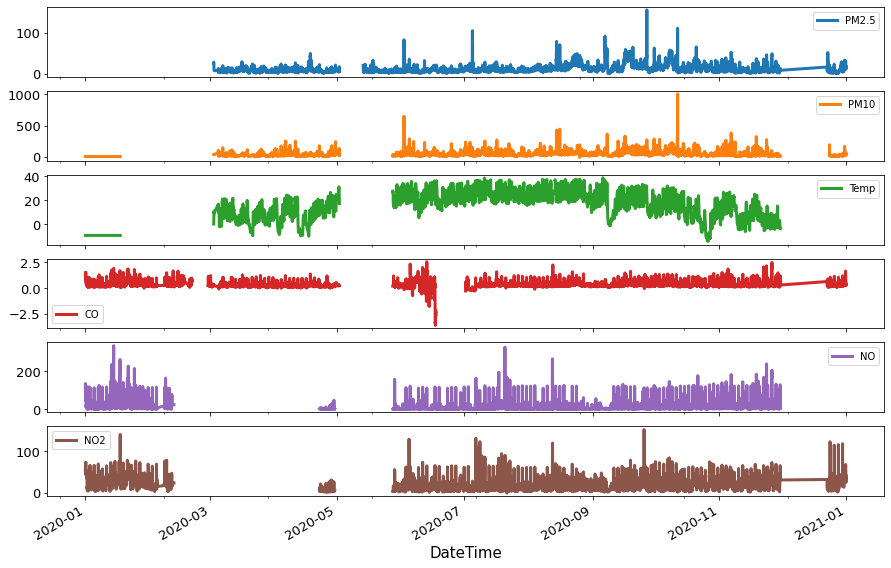

In [30]:
pm_data_2020=sftp_sams[['PM2.5','PM10','Temp','CO','NO','NO2']]
pm_data_2020.plot(figsize=(15,10), linewidth=3, fontsize=13, subplots=True)
plt.xlabel('DateTime', fontsize=15);

array([[<AxesSubplot:title={'center':'PM2.5'}>,
        <AxesSubplot:title={'center':'PM10'}>],
       [<AxesSubplot:title={'center':'Temp'}>,
        <AxesSubplot:title={'center':'CO'}>],
       [<AxesSubplot:title={'center':'NO'}>,
        <AxesSubplot:title={'center':'NO2'}>]], dtype=object)

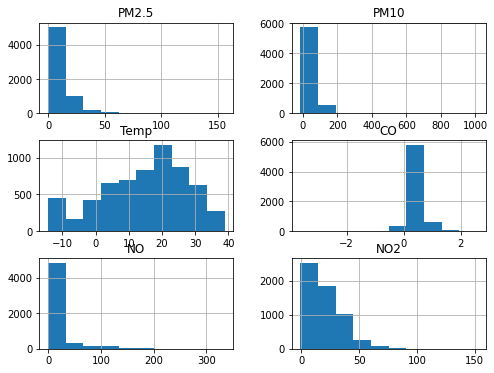

In [31]:
sftp_sams[['PM2.5','PM10','Temp','CO','NO','NO2']].hist()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

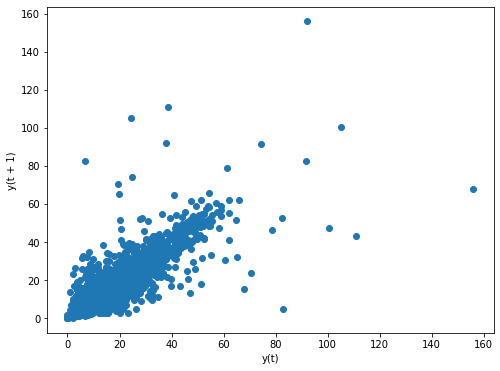

In [32]:
pd.plotting.lag_plot(sftp_sams['PM2.5'],lag=1)

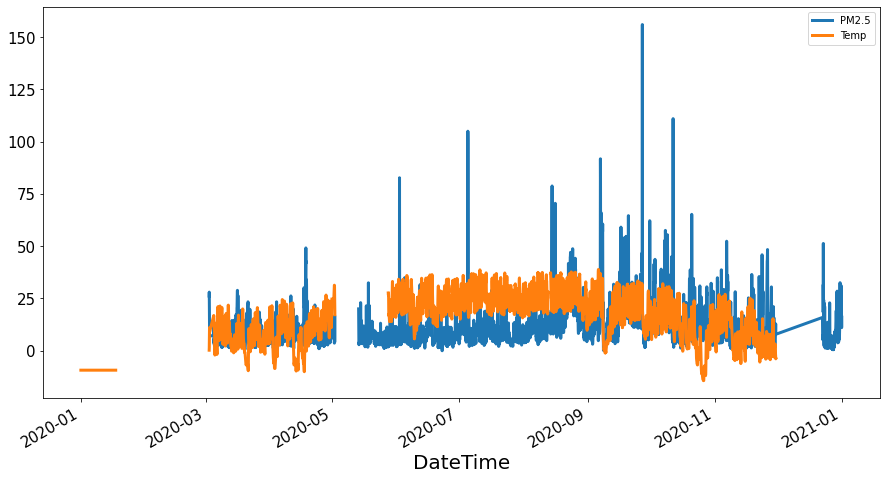

In [33]:
sftp_sams['2020':'2021'][['PM2.5','Temp']].plot(figsize=(15,8), linewidth=3, fontsize=15)
plt.xlabel('DateTime', fontsize=20);

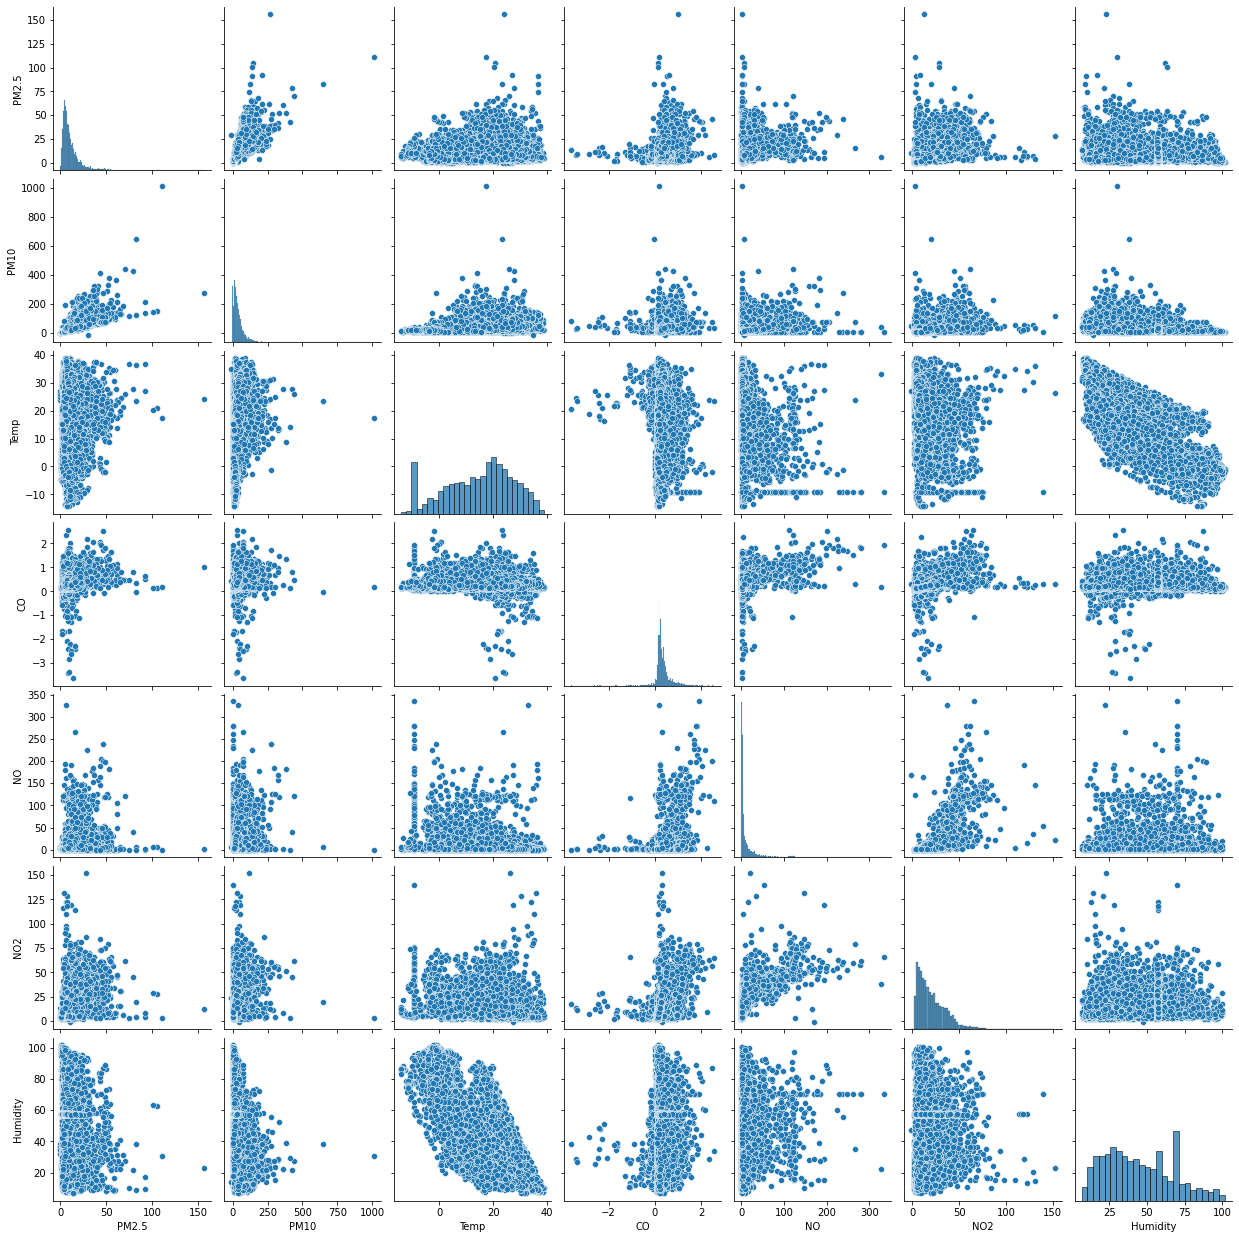

In [35]:
g = sns.pairplot(sftp_sams[['PM2.5','PM10','Temp','CO','NO','NO2','Humidity']])

In [36]:
sftp_sams_corr=sftp_sams[['PM2.5','PM10','Temp','CO','NO','NO2','Humidity']].corr(method='pearson')
sftp_sams_corr

PM2.5      PM10      Temp        CO        NO       NO2  Humidity
PM2.5     1.000000  0.702212  0.083994  0.338923  0.243291  0.362772 -0.044979
PM10      0.702212  1.000000  0.319079  0.223713  0.199632  0.257367 -0.315998
Temp      0.083994  0.319079  1.000000 -0.116952 -0.249578 -0.288987 -0.740191
CO        0.338923  0.223713 -0.116952  1.000000  0.502054  0.501765  0.080939
NO        0.243291  0.199632 -0.249578  0.502054  1.000000  0.697874  0.153320
NO2       0.362772  0.257367 -0.288987  0.501765  0.697874  1.000000  0.168160
Humidity -0.044979 -0.315998 -0.740191  0.080939  0.153320  0.168160  1.000000

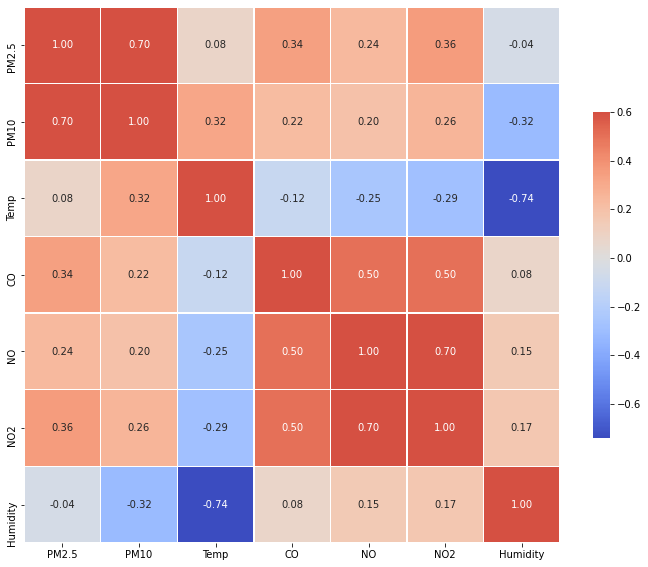

In [44]:
g = sns.heatmap(sftp_sams_corr,  vmax=.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
g.figure.set_size_inches(12,12)
plt.show()

In [36]:
sftp_sams_na = sftp_sams.copy()
sftp_sams_na=sftp_sams_na.dropna()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

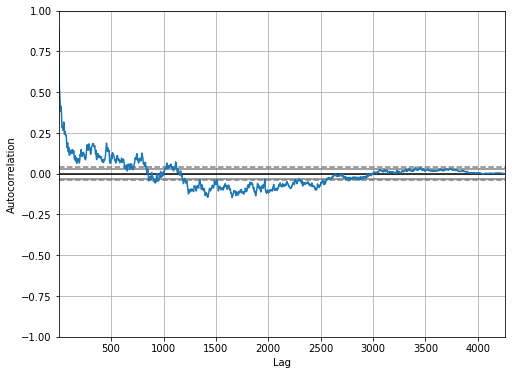

In [37]:
pd.plotting.autocorrelation_plot(sftp_sams_na['2020':'2021']['PM2.5'])

In [38]:
sftp_sams_na['PM2.5'].resample("1m").mean()

DateTime
2020-04-30     4.915000
2020-05-31     6.061616
2020-06-30     7.406100
2020-07-31     8.806196
2020-08-31    15.570451
2020-09-30    18.768951
2020-10-31    16.347376
2020-11-30    10.093058
Freq: M, Name: PM2.5, dtype: float64

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

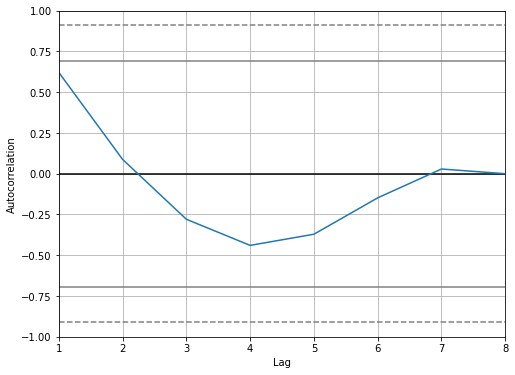

In [39]:
pd.plotting.autocorrelation_plot(sftp_sams_na['2020':'2021']['PM2.5'].resample("1m").mean())

In [45]:
sftp_sams['2020':'2021'][['day','PM2.5']].groupby('day').describe()

PM2.5                                                             
     count       mean        std   min     25%     50%      75%     max
day                                                                    
1    173.0   9.143699   4.689607  1.95  5.2500   8.080  12.2100   25.51
2    180.0  11.339111   9.537478  0.86  5.7900   8.705  13.2525   82.72
3    168.0  12.010238   7.653664  2.94  6.9075   9.620  15.9275   43.71
4    171.0  11.031287   5.451292  2.64  7.1450  10.280  13.2200   38.70
5    191.0  11.151571  11.373640  2.15  5.7000   9.070  12.8150  104.99
6    191.0  13.605340  12.922373  2.30  5.7900   9.360  16.2500   91.78
7    192.0  15.246146  14.950501  1.99  5.0200   9.255  19.2050   66.01
8    192.0  11.351979  14.429433  0.18  3.2775   5.860  10.1650   60.62
9    191.0   9.132251   9.943092  0.70  3.1850   6.600  10.3650   55.51
10   187.0  11.606203   8.212071  1.37  5.3750   9.920  14.6550   36.36
11   191.0  10.709005  11.483291  1.43  3.9500   6.850  13.9700  110.99
12   187.0   8.220856   4.712225  1.08  4.7650   7.190  10.7550   31.60
13   179.0   7.667095   3.925853  2.00  4.4450   7.510   9.8150   31.83
14   216.0  10.997685   8.864496  1.25  6.3350   9.575  13.0250   78.80
15   215.0   8.519023   4.900096  1.01  4.4150   7.450  12.0950   23.88
16   216.0  13.282083  11.938522  1.28  4.9000   9.325  19.4100   70.50
17   214.0  13.823972  12.094748  2.16  6.2625   9.680  16.1825   54.22
18   215.0  15.270512  13.414141  1.33  4.9250  11.510  19.1050   54.01
19   214.0  13.770047  10.774004  0.59  6.1600  10.610  18.3425   54.71
20   216.0  11.405324   9.565877  0.79  5.1850   8.515  14.8925   65.23
21   211.0  11.513744   7.510313  1.61  5.1100   9.530  17.3100   34.53
22   219.0  12.452420   8.896387  0.00  5.6950   8.980  17.0700   41.77
23   233.0  13.016910  10.836801  1.33  4.7300   8.360  19.0400   51.30
24   239.0  11.435941  10.918129  0.96  3.3200   6.790  19.3800   48.78
25   236.0   9.324449   8.572427  1.10  3.5200   5.855  11.9825   44.23
26   239.0  10.743054  10.209978  1.25  3.6550   6.470  16.5500   48.39
27   240.0   9.958000  12.712799  0.45  4.6200   8.455  12.8175  155.99
28   240.0   7.857083   5.815118  0.58  3.8750   5.980  10.3250   30.56
29   239.0   9.580837   6.234221  1.26  4.7250   7.710  14.0200   30.31
30   219.0   9.162100   8.381677  2.52  5.3700   7.040   9.8350   62.17
31   142.0   8.939577   6.092934  1.93  4.4925   6.870  11.4475   32.54

In [47]:
sftp_sams['hour'] = pd.DatetimeIndex(sftp_sams_non_indexed['DateTime']).hour

In [52]:
# x=sftp_sams['2020':'2021'][['hour','PM2.5']].groupby('hour').describe()
# x.to_csv('traffic_impact_speculation.csv', sep=',')
sftp_sams['2020':'2021'][['hour','PM2.5']].groupby('hour').describe()

PM2.5                                                             
      count       mean        std   min     25%     50%      75%     max
hour                                                                    
0     268.0   9.779739   9.019307  0.70  4.1700   6.690  11.9550   60.62
1     267.0  10.548539  10.349388  0.58  4.1000   6.580  13.4250   92.19
2     267.0  11.868427  13.483674  0.98  4.4450   7.820  14.9500  155.99
3     267.0  12.355543  11.343041  1.26  4.8250   8.180  15.6500   67.84
4     266.0  12.956917  11.934388  1.66  4.8925   9.465  16.9550  104.99
5     266.0  12.682857  11.839666  1.44  5.6225   9.330  15.9900  100.43
6     263.0  12.106236  10.276519  1.34  5.6100   8.830  15.1450   66.01
7     264.0  11.448750  10.323548  1.31  5.2725   8.285  14.0525   82.72
8     261.0  10.973793   8.950280  0.28  5.1800   7.890  13.7600   51.80
9     262.0  10.158092   8.995835  0.18  4.5950   7.120  12.9125   64.60
10    264.0   9.878939   8.937158  0.19  4.2675   6.850  12.4025   54.01
11    264.0   9.535455   8.296282  0.25  4.2275   7.310  12.5050   49.64
12    264.0   9.947841   7.995885  0.38  4.5950   7.755  12.9925   47.57
13    262.0  11.367977   8.691834  0.48  5.4150   9.300  14.7575   52.03
14    265.0  13.317774   9.749496  0.54  6.3000  10.690  16.6600   52.31
15    262.0  13.351603   9.914520  0.64  7.1675  10.790  16.6200   62.17
16    262.0  12.600687  10.086808  0.38  6.5675   9.810  15.8850   78.80
17    264.0  11.541136   8.915925  0.00  5.8300   9.320  14.0325   55.12
18    267.0  10.921536   8.681514  0.00  4.9300   8.090  14.4450   54.19
19    263.0   9.989354   8.694656  0.00  4.4550   7.510  12.7400   59.12
20    265.0  10.036264   9.456777  0.00  4.2800   6.880  12.8000   65.23
21    267.0   9.805318  11.009585  0.70  3.9100   6.930  11.7000  110.99
22    268.0   9.585373   9.534379  0.67  4.0175   6.920  11.8675   91.78
23    268.0   9.475149   9.395886  0.59  4.0975   6.465  11.2325   82.45

In [48]:
sftp_sams.tail()

Temp    CO  NO    NO2   PM10  PM2.5  Humidity  Wind Dir  \
DateTime                                                                       
2020-12-31 20:00:00   NaN  0.43 NaN  30.82  36.52  17.26     57.00    129.04   
2020-12-31 21:00:00   NaN  0.35 NaN  26.54  26.58  13.49     57.00    113.10   
2020-12-31 22:00:00   NaN  0.29 NaN  25.45  28.40  11.18     57.00    110.54   
2020-12-31 23:00:00   NaN  0.25 NaN  26.50  20.73  11.05     57.00    102.12   
2021-01-01 00:00:00   NaN  0.38 NaN  40.45  27.82  16.04     57.26     98.08   

                     Wind Speed  year  month  day  hour  
DateTime                                                 
2020-12-31 20:00:00        1.18  2020     12   31    20  
2020-12-31 21:00:00        1.26  2020     12   31    21  
2020-12-31 22:00:00        1.68  2020     12   31    22  
2020-12-31 23:00:00        1.71  2020     12   31    23  
2021-01-01 00:00:00        1.63  2021      1    1     0

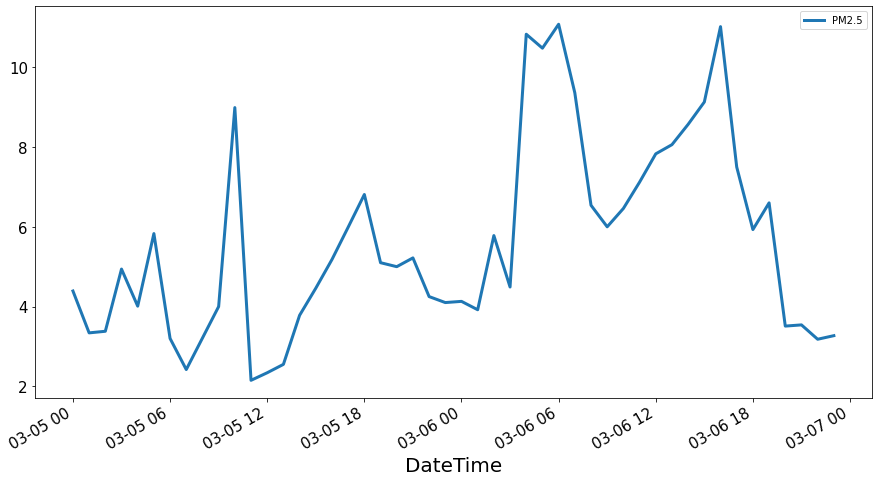

In [30]:
sftp_sams['2020-03-05':'2020-03-06'][['PM2.5']].plot(figsize=(15,8), linewidth=3, fontsize=15)
plt.xlabel('DateTime', fontsize=20);

<AxesSubplot:xlabel='DateTime'>

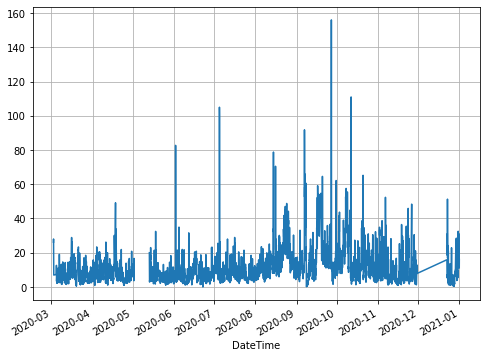

In [31]:
pm_data = sftp_sams['PM2.5']
pm_data.plot(grid=True)

In [32]:
import plotly.express as px
fig = px.line(sftp_sams_non_indexed, x='DateTime', y='PM2.5', title='PM2.5 with Slider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [41]:
sftp_sams_outliers = sftp_sams[sftp_sams['PM2.5'] > 75]

In [42]:
sftp_sams_outliers

Temp    CO     NO    NO2     PM10   PM2.5  Humidity  \
DateTime                                                                    
2020-06-02 07:00:00  23.45 -0.04   6.83  19.62   648.81   82.72     38.43   
2020-07-05 04:00:00  20.78  0.13   5.85  28.16   148.50  104.99     62.30   
2020-07-05 05:00:00  20.34  0.13   5.89  28.42   140.98  100.43     63.41   
2020-08-14 16:00:00  27.72  0.80  39.36  44.75   426.42   78.80     21.61   
2020-09-06 22:00:00  36.73  0.51   0.23   3.95   136.56   91.78      9.44   
2020-09-06 23:00:00  36.50  0.35   0.26   4.42   122.64   82.45      9.10   
2020-09-27 01:00:00  27.10  0.63   0.65   8.61   211.72   92.19     17.02   
2020-09-27 02:00:00  24.15  1.01   1.00  12.13   269.40  155.99     22.93   
2020-10-11 21:00:00  17.41  0.18   0.39   2.88  1010.08  110.99     30.45   

                     Wind Dir  Wind Speed  year  month  day  
DateTime                                                     
2020-06-02 07:00:00    136.40        0.60  2020      6    2  
2020-07-05 04:00:00    190.82       69.77  2020      7    5  
2020-07-05 05:00:00    125.29        1.16  2020      7    5  
2020-08-14 16:00:00    177.99        0.29  2020      8   14  
2020-09-06 22:00:00     69.63        1.90  2020      9    6  
2020-09-06 23:00:00     75.95        1.43  2020      9    6  
2020-09-27 01:00:00     64.33        2.47  2020      9   27  
2020-09-27 02:00:00     54.67        1.70  2020      9   27  
2020-10-11 21:00:00    257.78        5.69  2020     10   11